# EDA on Insurance Claim

This script perform EDA on Insurance Claim datasets

#### Input Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv("insurance_data.csv")
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


1. correlation between claim vs variables
2. Is age positively correlated with claim? Apakah dengan meningkatnya umur, nilai klaim meningkat?
3. Which gender that claims more than others? Klaim mana yang cenderung lebih besar? 
4. Gender vs bmi,bp,db
5. age vs  bmi,bp,db
6. What factors (e.g., age, BMI, smoking status) have the strongest impact on insurance charges?
7. How do demographic factors (e.g., region, gender) influence claims?

In [12]:
df.drop(['index','PatientID'],
  axis='columns', inplace=True)

In [13]:
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...
1335,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


<Axes: >

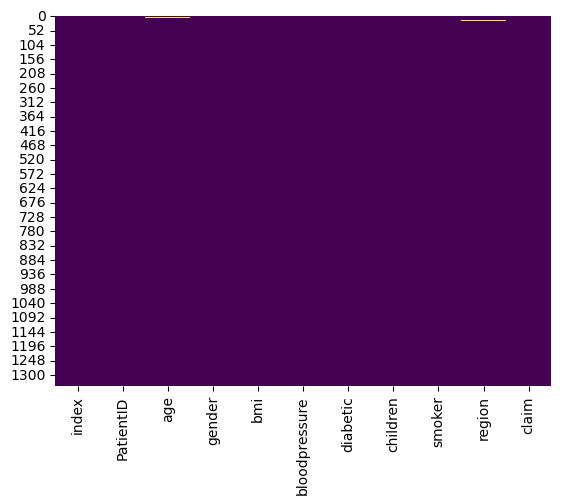

In [9]:
df.isnull().sum()
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

C:\Users\123\AppData\Local\Temp\ipykernel_20060\183792097.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')


<Axes: >

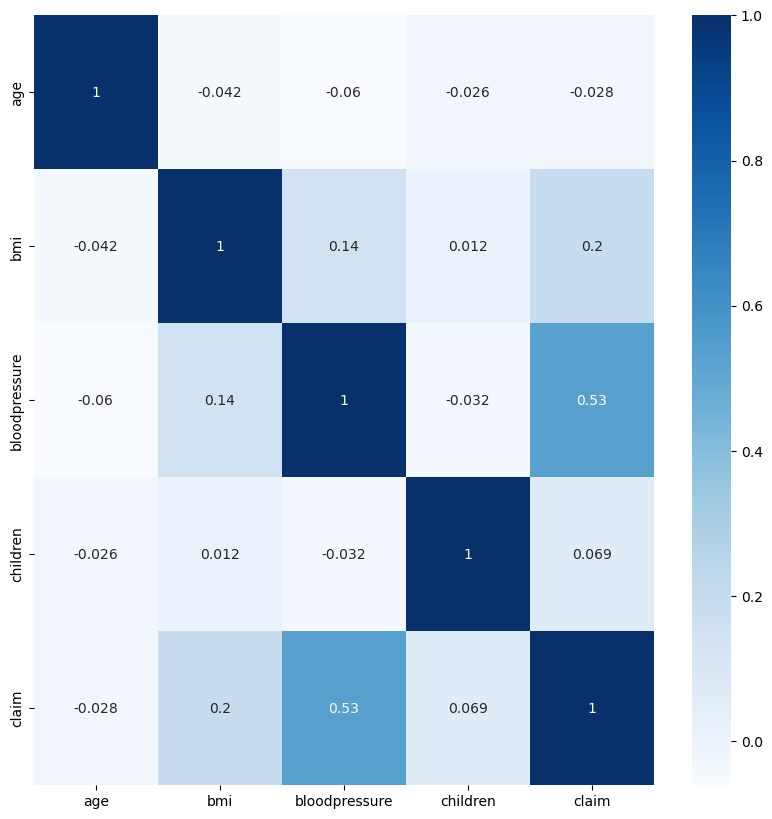

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

Text(0, 0.5, 'Claim')

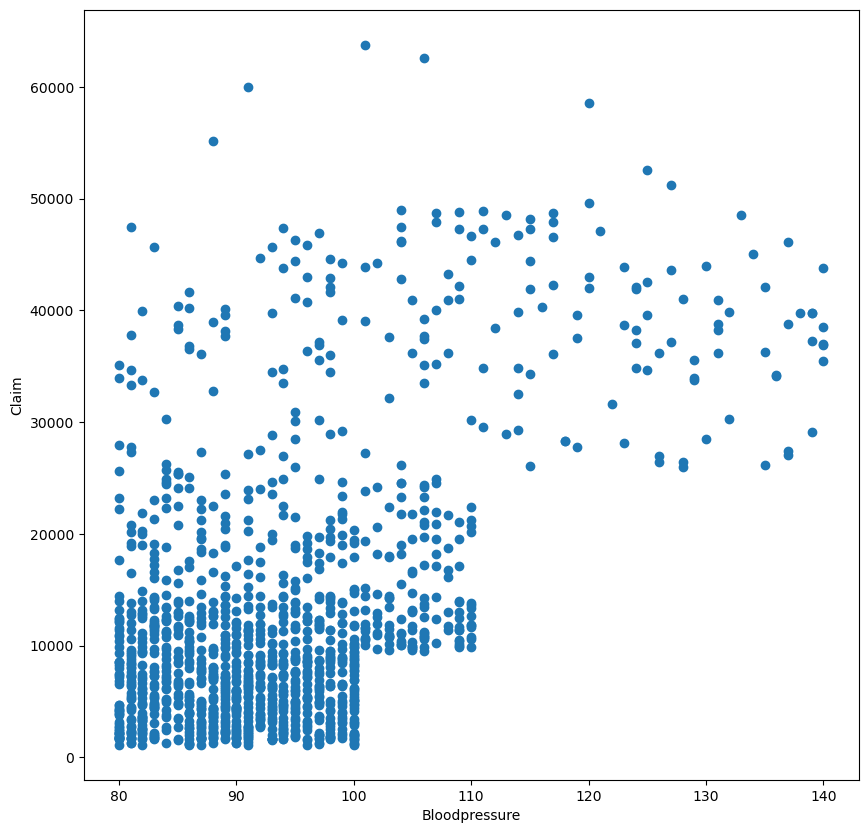

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(x='bloodpressure',y='claim',data=df)
plt.xlabel('Bloodpressure')
plt.ylabel('Claim')

<Axes: xlabel='children', ylabel='Count'>

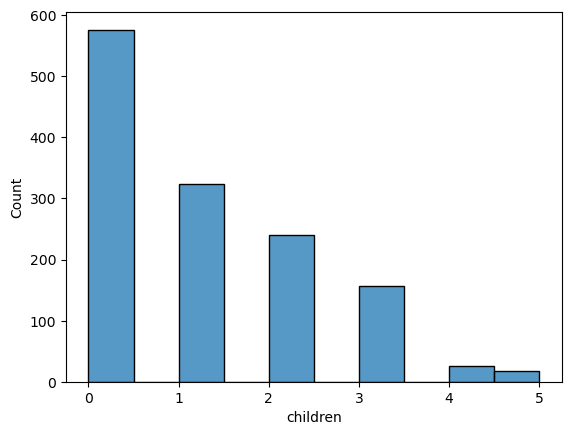

In [19]:
sns.histplot(df.children,bins=10)
